In [1]:
import numpy as np
from matplotlib import pyplot as plt


array([[1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
       [0, 0, 1, 0, 1, 1, 1, 0, 1, 1]])


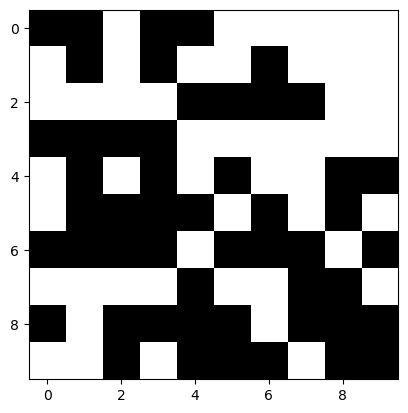

In [2]:
maze_size = (10, 10)  
maze_rand = np.random.choice([0, 1], size=maze_size)
print(repr(maze_rand))
plt.imshow(maze_rand, cmap='binary')
plt.show()

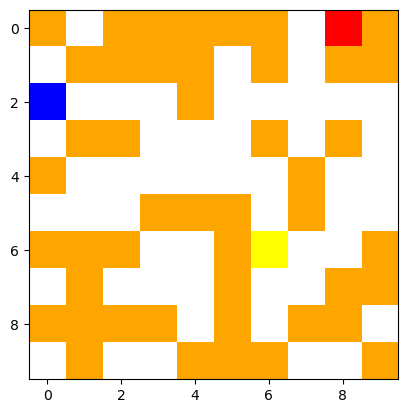

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (6, 6)]
(101, 4)
Q matrix: 

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 

In [57]:
class Maze_env:
    def __init__(self , start, target, coins, maze):
        self.maze = maze
        self.target = target
        self.start = start
        self.coins = coins
        self.position = 0
        self.R = 0
        self.Q = 0
        self.states = []
        self.coin_collected = False
        
    def plot_env(self):
        cmap = plt.cm.colors.ListedColormap(['white', 'orange', 'red', 'blue', 'yellow'])
        maze_plot = self.maze.copy()
        maze_plot[self.target] = 2
        maze_plot[self.start] = 3
        maze_plot[self.coins] = 4
        plt.imshow(maze_plot, cmap=cmap)
        plt.show()
        
    def plot_env_position(self, position):
        cmap = plt.cm.colors.ListedColormap(['white', 'orange', 'red', 'blue', 'yellow'])
        maze_plot = self.maze.copy()
        maze_plot[self.target] = 2
        maze_plot[position] = 3
        maze_plot[self.coins] = 4
        plt.imshow(maze_plot, cmap=cmap)
        plt.show()

    def create_r_matrix(self):
        actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        num_states = self.maze.shape[0] * self.maze.shape[1]
        R = np.full((num_states, 4), np.nan)

        state_index = 0
        for i in range(self.maze.shape[0]):
            for j in range(self.maze.shape[1]):
            # If the cell is not a wall
                if self.maze[i, j] == 0:
                    for index, action in enumerate(actions):
                        new_position = (i + action[0], j + action[1])
                        # If action leads to a valid state
                        if (0 <= new_position[0] < self.maze.shape[0] and
                            0 <= new_position[1] < self.maze.shape[1] and
                            self.maze[new_position] == 0):
                            # Calculate the state number for the new position
                            # Set reward to 0
                            R[state_index, index] = -5

                            # If action leads to goal state set reward to 100
                            if new_position == self.target:
                                R[state_index, index] = 1000
                            if new_position == self.coins:
                                R[state_index, index] = 200
                state_index += 1
                            
        self.R = R
        print(self.R.shape)
        return self.R
    
    def reward(self, state, action):
        state = self.states[state]
        x, y = state
        if action == 0:  # up
            x -= 1
        elif action == 1:  # down
            x += 1
        elif action == 2:  # left
            y -= 1
        elif action == 3:  # right
            y += 1
        if x < 0 or x >= len(self.maze) or y < 0 or y >= len(self.maze[0]) or self.maze[x][y] == 1:
            return -100  # hit a wall (including edges wall?)
        elif (x, y) == self.target:
            print("Reached Target!")
            print((x,y))
            return 1000  # reached the target
        elif (x, y) == self.coins and not self.coin_collected:
            return 1000
        else:
            return -2  # regular step
        
    def transition(self, state, action):
        state_new = self.states[state]
        x, y = state_new
        if action == 0:  # up
            x -= 1
        elif action == 1:  # down
            x += 1
        elif action == 2:  # left
            y -= 1
        elif action == 3:  # right
            y += 1

        if x < 0 or x >= len(self.maze) or y < 0 or y >= len(self.maze[0]) or self.maze[x][y] == 1:
            return self.states.index(state_new)  # hit a wall, stay in the same state
        else:
            if (x, y) == self.coins and not self.coin_collected:
                print("Coin collected '{}'".format(self.coin_collected))
                self.coin_collected = True
                return 100 #specific index for coin
            else:
                return self.states.index((x,y))  # move to the new state
        
    
    def create_q_matrix(self):
        coord_to_index = []
        for i in range(self.maze.shape[0]):
            for j in range(self.maze.shape[1]):
                coord_to_index.append((i,j))
        coord_to_index.append(self.coins)
        print(coord_to_index)
                
        num_states = self.maze.shape[0] * self.maze.shape[1] + 1
        num_actions = 4
        self.Q = np.zeros((num_states, num_actions))
        print(self.Q.shape)
        self.states = coord_to_index
        return self.Q, coord_to_index

maze = np.array([
    [1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
 [0, 1, 1, 1, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
 [1, 1, 1, 1, 0, 1, 0, 1, 1, 0],
 [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]
                ])
env = Maze_env((2,0),(0,8),(6,6), maze) 
env.plot_env()
# R = env.create_r_matrix()
# print('R matrix: \n\n{}'.format(R))
Q, coord_to_index = env.create_q_matrix()
print('Q matrix: \n\n{}'.format(Q))




In [58]:
class Q_learning:
    
    def __init__(self, alpha, gamma, epsilon, episodes, steps, env, states):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.states = states

#         self.R = env.R
#         self.R_mod = self.R.copy()
        self.Q = env.Q
        self.episodes = episodes
        self.steps = steps
        self.start = env.start
        self.target = self.states.index(env.target)
        self.coins = env.coins
        self.env = env
        self.episodes_rewards = [] 
        print("Initial Q matrix is '{}'".format(self.Q))

    def plot_rewards(self):
        plt.plot(self.episodes_rewards)
        plt.show()
        
    def show_Q_spec(self,coord):
        print(q_learning.Q[self.states.index(coord)])
        
    def train(self):
        print(self.states)
        print("Starting taget is '{}'".format(self.target))
        for episode in range(self.episodes):
            s = self.states.index(self.start)
            print("Starting state is '{}'".format(s))
            episode_reward = 0
            env.coin_collected = False
#             self.R_mod = self.R
            for timestep in range(self.steps):

                # Epsilon-greedy action choice
#                 available_actions = np.where(~np.isnan(self.R_mod[s]))[0]
#                 q_values = [self.Q[s,a] for a in available_actions]
#                 best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]

                if np.random.uniform() < self.epsilon:
                    a = np.random.choice(4)
#                     a = np.random.choice(available_actions)

                else:
                    a = np.argmax(self.Q[s,:])
#                     a = np.random.choice(best_actions)

                # Environment updating
                r = env.reward(s, a)
#                 r = self.R_mod[s,a]
                episode_reward += r
                new_s = env.transition(s, a)
#                 if temp_new_s == self.coins:
#                     print("Coin collected '{}'".format(env.coin_collected))
#                     env.coin_collected = True
#                 new_s = self.states.index(temp_new_s)
                # Doubts coordinates to Q system?
                # Q value updating
#                 print(new_s)
                self.Q[s,a] = self.Q[s,a] + self.alpha * ( r + self.gamma * np.max(self.Q[new_s,:]) - self.Q[s,a])

                if new_s == self.target:
                    break
                s = new_s
            
            self.episodes_rewards.append(episode_reward)
            if episode % 2 == 0:
                print('Episode {} finished. Episode Reward {}.Q matrix values:\n{}'.format(episode,episode_reward,self.Q.round(1)))
                self.epsilon = max(self.epsilon*0.995,0.1)
                print(self.epsilon)
            
    def test(self, limit):

        s = self.states.index(self.start)
        print("Starting state is '{}'".format(s))
        episode_reward = 0
        env.coin_collected = False
        for timestep in range(limit):
            self.env.plot_env_position(self.states[s])
            a = np.argmax(self.Q[s])
            print(a)

            # Environment updating
            temp_new_s = env.transition(s, a)
#             new_s = self.states.index(temp_new_s)

            if temp_new_s == self.target:
                self.env.plot_env_position(self.states[temp_new_s])
                break
            s = temp_new_s

            

In [59]:
q_learning = Q_learning(1, 0.99, 1, 1000, 1000, env, coord_to_index)
q_learning.train()

Initial Q matrix is '[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0.

Reached Target!
(0, 8)
Episode 42 finished. Episode Reward -22844.Q matrix values:
[[    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [ 9182.8  9376.6  8701.4  1000. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [ 9369.9  9565.6  9369.9  9369.9]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [10060.4 10263.  10069.9 10060.4]
 [    0.      0.      0.      0. ]
 [ 9280.8  9473.3  8792.3  9278.6]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [ 9467.9  9467.9  9467.6 10263. ]
 [ 9566.2  9566.2  9565.6 10368.7]
 [10270.7 10270.7 10263.  10064.2]
 [ 9966.2 10167.9 10166.   9966.2]
 [    0.      0.      0.      0. ]
 [10158.4 10158.4 10165.  10368.7]
 [10270

Episode 194 finished. Episode Reward -28928.Q matrix values:
[[    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [14737.7 14933.7 14737.7  1000. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [17473.1 18834.5 18559.7 17473.1]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [20610.  20748.9 20551.3 20610. ]
 [    0.      0.      0.      0. ]
 [15085.6 15028.8 14891.6 14834.8]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [18657.7 18837.  18736.5 18839.9]
 [18928.7 18932.6 18834.5 19249.5]
 [19052.1 18934.2 19055.  20688.2]
 [19247.5 20899.2 19150.1 19054.5]
 [    0.      0.      0.      0. ]
 [20708.  20901.1 20761.9 20782.3]
 [20974.6 20684.3 20805.  207

Episode 380 finished. Episode Reward -28242.Q matrix values:
[[    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [10769.6 11494.7 10769.6  1000. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [10409.7 11423.  10232.8 10409.7]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [11171.6 11347.  11153.  11171.6]
 [    0.      0.      0.      0. ]
 [11398.7 11398.7 11396.7 11396.7]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [10330.8 10261.9 11325.  11238.5]
 [11105.6 11228.  11209.8 11105. ]
 [11007.  11043.4 11203.6 11134.9]
 [11036.9 11092.5 11141.4 11036.9]
 [    0.      0.      0.      0. ]
 [11269.6 11303.6 11268.6 11301.7]
 [11417.9 11417.9 11366.6 113

Reached Target!
(0, 8)
Starting state is '20'
Coin collected 'False'
Reached Target!
(0, 8)
Episode 454 finished. Episode Reward -8952.Q matrix values:
[[    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [ 8839.3  8845.9  8842.2  1000. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [ 8277.7  8289.9  7703.9  7830.9]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [ 8496.9  8494.6  8364.6  8496.9]
 [    0.      0.      0.      0. ]
 [ 8937.3  8758.3  8930.7  8934.5]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [ 8369.1  7915.8  8364.3  8366.3]
 [ 8269.2  8269.2  8289.9  8367.6]
 [ 8354.8  8443.6  8367.2  8399.8]
 [ 8451.8  8480.1  8367.6  8356.1]
 [    0.

Coin collected 'False'
Episode 650 finished. Episode Reward -14032.Q matrix values:
[[   0.     0.     0.     0. ]
 [   0.     0.     0.     0. ]
 [   0.     0.     0.     0. ]
 [   0.     0.     0.     0. ]
 [   0.     0.     0.     0. ]
 [   0.     0.     0.     0. ]
 [   0.     0.     0.     0. ]
 [1889.8 1957.1 1867.8 1000. ]
 [   0.     0.     0.     0. ]
 [   0.     0.     0.     0. ]
 [1901.7 2005.6 1901.7 1990.1]
 [   0.     0.     0.     0. ]
 [   0.     0.     0.     0. ]
 [   0.     0.     0.     0. ]
 [   0.     0.     0.     0. ]
 [1935.6 1984.4 1978.4 1978.4]
 [   0.     0.     0.     0. ]
 [1944.2 1971.9 1859.1 1867.9]
 [   0.     0.     0.     0. ]
 [   0.     0.     0.     0. ]
 [1999.7 1984.1 1953.  2013.6]
 [1954.4 1890.1 1996.8 1985.5]
 [1931.9 1912.2 1988.1 1995. ]
 [1965.  1995.4 1985.5 1921.8]
 [   0.     0.     0.     0. ]
 [1981.7 2006.5 1905.8 1995.7]
 [1970.5 1874.9 1984.4 1978.9]
 [1969.4 1952.  1972.9 1988.6]
 [1891.8 1947.6 1975.2 2010.7]
 [1963.  1977.  1

Starting state is '20'
Coin collected 'False'
Reached Target!
(0, 8)
Episode 768 finished. Episode Reward -7592.Q matrix values:
[[    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [  890.    994.8   890.   1000. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [ 2627.1  2734.   2723.5  2668.7]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [ 2695.   2715.6  2720.9  2699.3]
 [    0.      0.      0.      0. ]
 [  988.    980.4   928.8   904.7]
 [    0.      0.      0.      0. ]
 [    0.      0.      0.      0. ]
 [ 2725.1  2701.1  2674.7  2704.7]
 [ 2641.8  2652.1  2710.4  2720.6]
 [ 2629.   2661.1  2750.1  2711.4]
 [ 2724.   2734.9  2727.   2631.5]
 [    0.      0.      0.      0

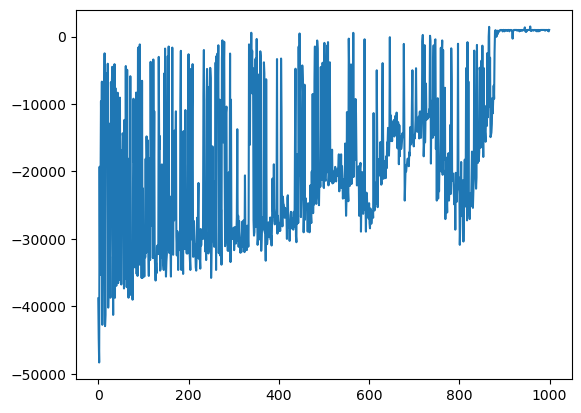

In [60]:
q_learning.plot_rewards()

Starting state is '20'


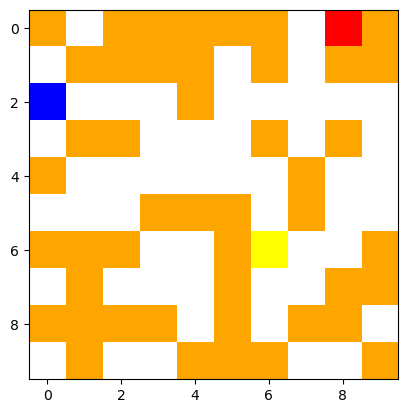

3


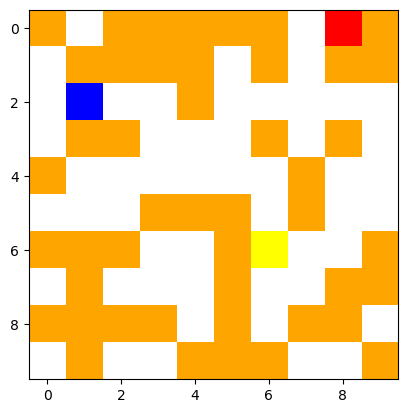

3


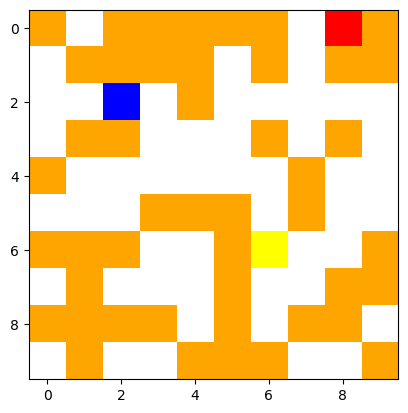

3


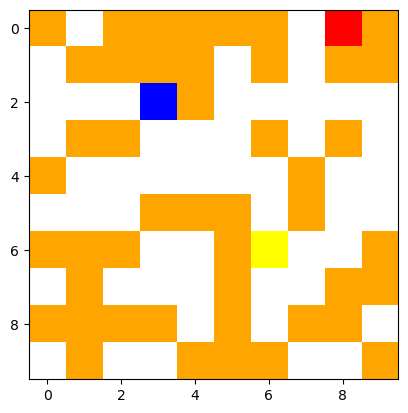

1


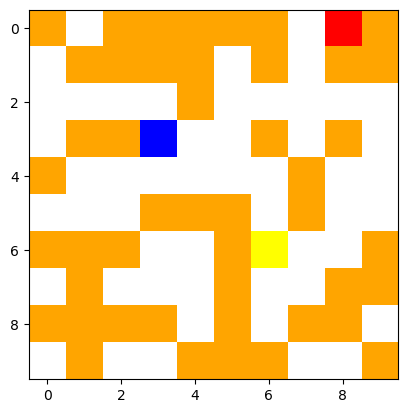

3


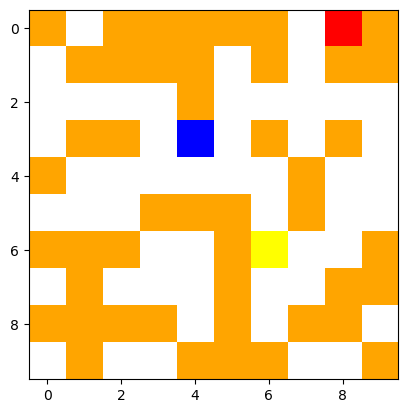

3


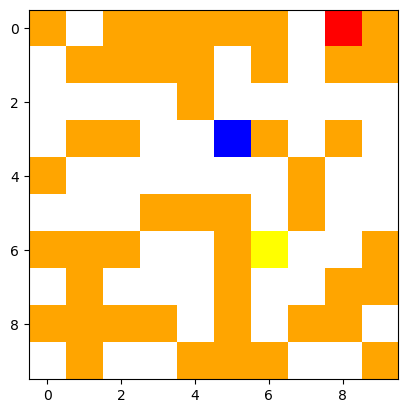

0


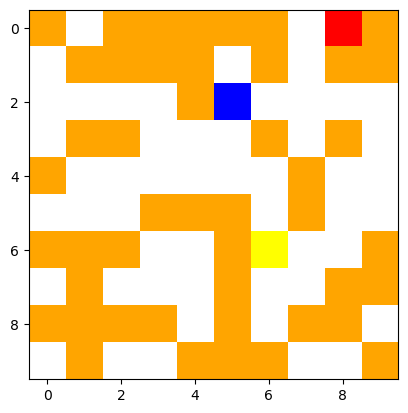

3


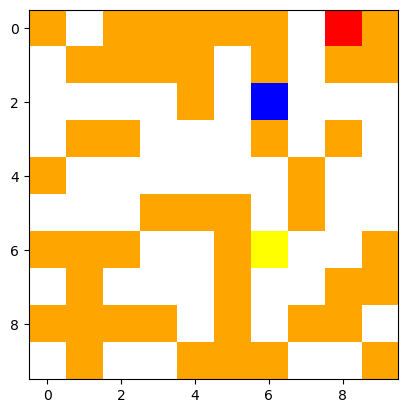

3


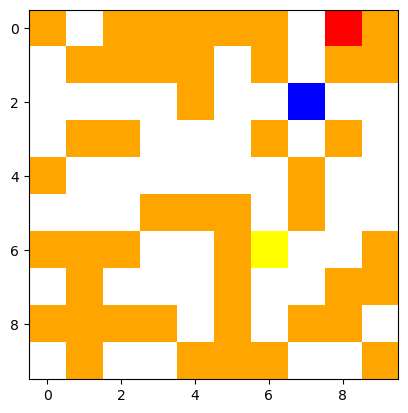

0


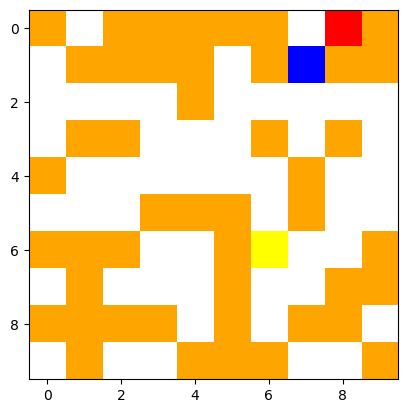

0


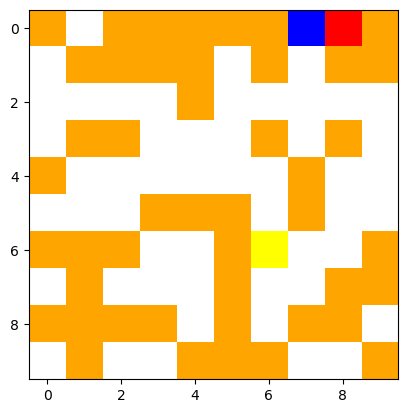

3


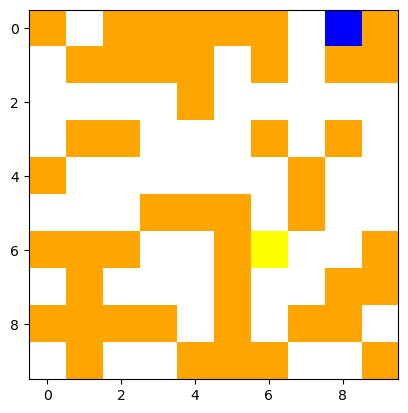

In [61]:
q_learning.test(50)

In [62]:
q_learning.show_Q_spec((5,6))
q_learning.show_Q_spec((3,5))

[913.66273996 934.06512307 883.4052786  848.5968977 ]
[941.18805988 918.47841749 918.47841749 831.77617928]
